In [10]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Graph').getOrCreate()

vertices = spark.createDataFrame([
    ("1", "A"),
    ("2", "B"),
    ("3", "C"),
    ("4", "D"),
    ("5", "E")],
    ["id", "name"])

edges = spark.createDataFrame([
    ("1", "3"),
    ("1", "5"),
    ("2", "1"),
    ("2", "3"),
    ("2", "4"),
    ("2", "5"),
    ("3", "2"),
    ("4", "3"),
    ("5", "2"),
    ("5", "3")],
    ["src", "dst"])


In [11]:
from graphframes import *

g = GraphFrame(vertices,edges)
g.inDegrees.show()
g.outDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  3|       4|
|  5|       2|
|  1|       1|
|  4|       1|
|  2|       2|
+---+--------+

+---+---------+
| id|outDegree|
+---+---------+
|  1|        2|
|  2|        4|
|  3|        1|
|  4|        1|
|  5|        2|
+---+---------+



In [12]:
my_edges = [(r.src, r.dst) for r in edges.collect()]
print(my_edges)

[('1', '3'), ('1', '5'), ('2', '1'), ('2', '3'), ('2', '4'), ('2', '5'), ('3', '2'), ('4', '3'), ('5', '2'), ('5', '3')]


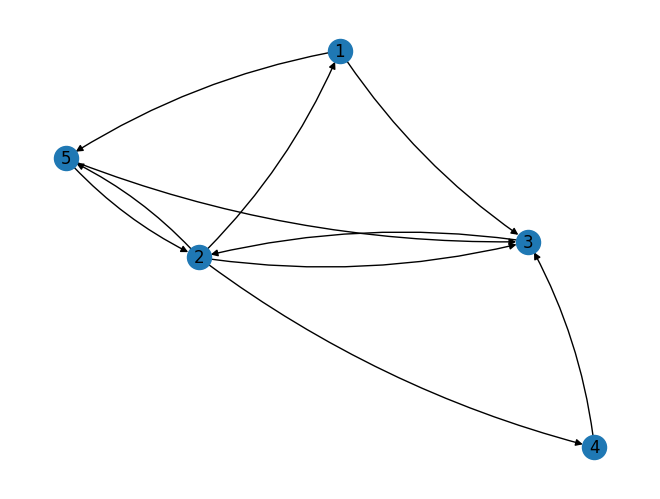

In [13]:
import networkx as nx

nxdg = nx.MultiDiGraph()
nxdg.add_edges_from(my_edges)
nx.draw(nxdg, with_labels=True, connectionstyle='arc3, rad=0.1' )

In [14]:
pr_res = g.pageRank(resetProbability=0.15, tol=0.02)

In [15]:
pr_res.vertices.sort("pagerank", ascending = False).show()

+---+----+------------------+
| id|name|          pagerank|
+---+----+------------------+
|  2|   B| 1.695570748765828|
|  3|   C| 1.449919247690694|
|  5|   E|0.7519442001306041|
|  1|   A|0.5512829017064372|
|  4|   D|0.5512829017064372|
+---+----+------------------+



In [16]:
spark.stop()